<a href="https://colab.research.google.com/github/ligsid/comput_math_MIPT/blob/master/partial_diff_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №5
##Методы решения уравнения переноса
####Вариант 2, задание 5

Условия задачи:
</br> Найти аналитическое и численное решения смешанной задачи для уравнения переноса в квадрате $0 \leq x$, $t \leq 1$. Сравнить их значения в одиннадцати равноудаленных точках в момент времени $t = 1$
</br> Дифференциальная задача: $$ \frac{\partial u}{\partial t} + (x + 4)\frac{\partial u}{\partial x} = 0$$ $$ u(x, 0) = (x+4)^2; u(0, t) = 16e^{-2t} $$ Разностная схема: $$ D_{h} = \{(x_{l}, t^n): x_{l} = hl, hL = 1, l = \overline{1, L}; t^n = n\tau, \tau N = 1, n = \overline{0,N} )\} $$ $$ u_{l}^{n+1} = u_{l}^{n} + \frac{\tau}{2h}(x_l + 4)(1 - 0.5\tau)(-u_{l-2}^{n} + 4u_{l-1}^{n} - 3u_{l}^{n}) + \frac{\tau^2}{2h^2}(x_l + 4)(u_{l-2}^n - 2u_{l-1}^n + u_{l}^{n})$$ $$ l = \overline{2, L}, n = \overline{0, N-1}$$ $$ u_{l}^{0} = (x_l + 4)^2, l = \overline{0, L} $$ $$ u_{0}^n = 16e^{-2t^n}, n = \overline{1, N}$$


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

1. Аналитическое решение:
</br> Первые интегралы полученной системы: $$ \nu_{1} = t - lnx $$ $$ \nu_{2} = u $$ Подставляя в первое начальное условие и выражая $ x, u $ явно: $$ x = e^{-\nu_{1}^{0}} - 4$$ $$ u = \nu_{2}^{0} $$ Обратно подставляем у начальное условие и меняем $ \nu_{i}^{0}$ на $\nu_{i} $ получаем: $$ u = e^{-2t}(x+4)^2 $$

2. Данная разностная схема апроксимирует наше дифференциальное уравнение: $$ O(\tau + h^2) $$

3. Построенние дополнительного начального условия для замыкания системы: $$ [u]^{n}_{1} \approx [u]^{0}_{1} +  [u']^{0}_{1} h + [u'']^{0}_{1} \frac{h^2}{2}$$
Получаем, что $$ [u']^{0}_{1} = 8e^{-2t^n} $$ $$ [u'']^{0}_{1}  = -4e^{-2t^n} $$
В итоге начальное условие $$ [u]^{n}_{1} = 16e^{2t^n}\left(1 + \frac{h}{2} - \frac{h^2}{8}\right), n = \overline{1, N} $$

4. Численное решение уравнения

In [ ]:
print('Введите кол-во точек x:')
L = int(input())
x = np.linspace(0, 1, L+1)
h = 1/L
print('Введите число tau/h:')
tau = float(input()) * h
t = np.linspace(0, 1, int(1/tau) + 1)

Введите кол-во точек x:
11
Введите число tau/h:
0.23


In [ ]:
u = np.zeros((int(1/tau) + 1, L + 1))
for i in range(len(x)):
  u[0][i] = (x[i] + 4)**2
for i in range(len(t)):
  u[i][0] = 16*np.e**(-2*t[i])
for i in range(len(t)):
  u[i][1] = (16*np.e**(-2*t[i])) * (1 + h/2 - (h**2)/8)

In [ ]:
for j in range(1, len(t)):
  for i in range(2, len(x)):
    u[j][i] = u[j - 1][i] + tau/(2*h)*(x[i] + 4)*(1 - tau/2)*(-u[j - 1][i-2] + 4*u[j - 1][i-1] - 3*u[j - 1][i]) + (tau**2)/(2*h**2)*(x[i] + 4)*(u[j - 1][i-2] - 2*u[j - 1][i-1] + u[j - 1][i])

5. Сравнение с аналитическим решение

In [ ]:
def u_an(t, x):
  return (np.e**(-2*t)*(x + 4)**2)

In [ ]:
data = pd.DataFrame()
data['Аналитическое решение'] = u_an(1, x)
data['Численное решение'] = u[-1]
data.head()

,Аналитическое решение,Численное решение
0,2.165365,2.165365
1,2.264909,2.261553
2,2.366690,2.362976
3,2.470708,2.467497
4,2.576963,2.574529


Text(0.5, 1.0, 'Графики функций для сравнения решений')

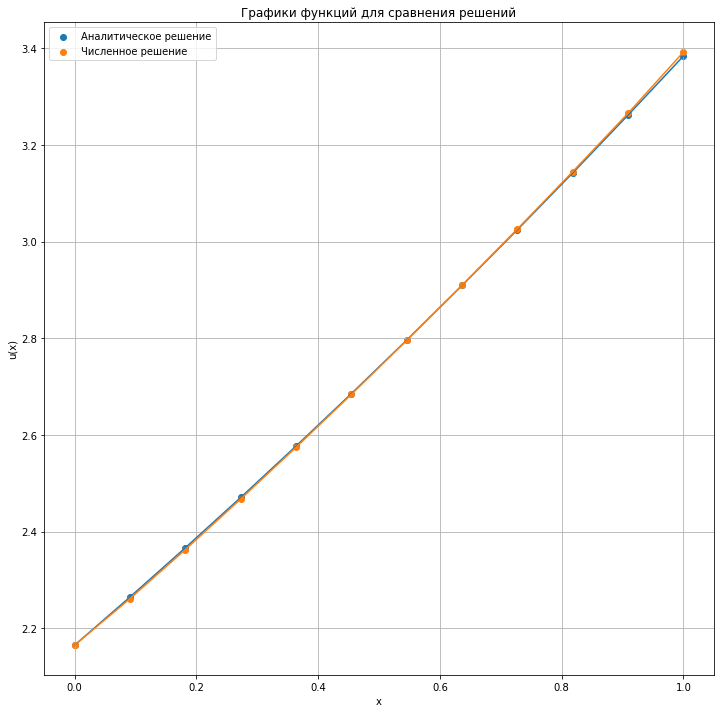

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(x, u_an(1, x), label = 'Аналитическое решение')
plt.plot(x, u_an(1, x))
plt.scatter(x, u[-1], label = 'Численное решение')
plt.plot(x, u[-1])
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Графики функций для сравнения решений')

Методом научного тыка, выяснено что ошибка не накапливается при $\tau/h < 0.23$

In [ ]:
print('Погрешность:', max(u_an(1, np.array(x)) - u[-1])/3)

Погрешность: 0.0012377763505247625


6. Посчитаем во сколько меняется погрешность при увеличении точек

In [ ]:
err11 = max(u_an(1, np.array(x)) - u[-1])

In [ ]:
err22 = max(u_an(1, np.array(x)) - u[-1])

In [ ]:
print('Погрешность уменьшается при увеличении точек в 2 раза:', err11/err22)

Погрешность уменьшается при увеличении точек в 2 раза: 3.6329626210840518


Теория дает нам устойчивость численного решение при $$ \tau_{n} \leq \frac{2h}{\smash{\displaystyle\max_{n}} a^n_{l}} $$

In [ ]:
def a(x):
  return x + 4
print('Получается тау на h должно быть не больше' , 2/max(a(x)))

Получается тау на h должно быть не больше 0.4
